In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("data_primer-medicion.csv")

In [3]:
# Definimos las listas con V1 (Volumen de HCl para que el NaOH con fenolftaleína pase de rosa a transparente)\n",
V1_1 = np.array(data["#1"])[::2]
V1_2 = np.array(data["#2"])[::2]
V1_3 = np.array(data["#3"])[::2]
V1_4 = np.array(data["#4"])[::2]
                       
# Definimos las listas con V2 (Volumen agregado de HCl para que el NaOH con fenolftaleína y naranja de metilo pase de naranja a rojo)\n",
V2_1 = np.array(data["#1"])[1::2]
V2_2 = np.array(data["#2"])[1::2]
V2_3 = np.array(data["#3"])[1::2]
V2_4 = np.array(data["#4"])[1::2]

In [4]:
# Calculamos las diferencias de volumen que representan al CO2 atrapado en el NaOH\n",
DV_1 = V2_1 - V1_1 
DV_2 = V2_2 - V1_2
DV_3 = V2_3 - V1_3
DV_4 = V2_4 - V1_4

In [5]:
#Le restamos el primer valor, dado que el NaOH ya estaba siendo usado\n",
DV_1 = DV_1 - DV_1[0]
DV_2 = DV_2 - DV_2[0]
DV_3 = DV_3 - DV_3[0]
DV_4 = DV_4 - DV_4[0]

In [6]:
#agrego un 0 como primer valor
#DV_1 = np.insert(DV_1, 0, 0., axis=0) 
#DV_2 = np.insert(DV_2, 0, 0., axis=0)
#DV_3 = np.insert(DV_3, 0, 0., axis=0)
#DV_4 = np.insert(DV_4, 0, 0., axis=0)

In [7]:
#INCERTEZAS
sigma_C_NaOH=((0.1*0.05/1)**2 + (0.1*10*0.05/(1**2))**2)**0.5

sigma_C_HCl= ( (5/10*sigma_C_NaOH)**2 + (0.1*0.05/10)**2 + (5*0.1*0.05/100)**2   )**0.5

def error_g(V):
    A=0.5*0.5*44/5
    B=V*0.5*44/5
    C=V*0.5*44/5
    D=V*0.5*0.5*44/25
    
    sigma_V_NaOH=0 #en L, sería tipo 500 mas menos 1mL
    
    return ( (A*0.05)**2 + (B*sigma_C_HCl)**2  + (C*0.001)**2 + (D*0.1)**2 )**0.5

In [8]:
x=np.array([0,1,2,3,5,6,7])

In [9]:
def gramos(x):#meter el volumen de la diferencia
    return x*0.4545*0.5*44/5

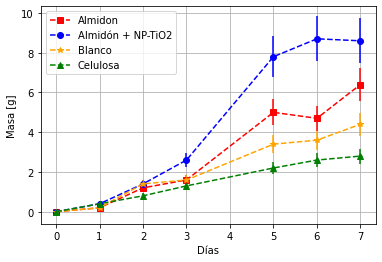

In [10]:
plt.plot(x,gramos(DV_1),'s--',label='Almidon',zorder=4,color='red')
plt.plot(x,gramos(DV_3),'o--',label='Almidón + NP-TiO2',zorder=4,color='blue')
plt.plot(x,gramos(DV_4),'*--',label='Blanco',zorder=4,color='orange')
plt.plot(x,gramos(DV_2),'^--',label='Celulosa',zorder=4,color='green')

plt.errorbar(x, gramos(DV_1), yerr=error_g(gramos(DV_1)*24/22), fmt='.',color='red')
plt.errorbar(x, gramos(DV_3), yerr=error_g(gramos(DV_3)*24/22), fmt='.',color='blue')
plt.errorbar(x, gramos(DV_4), yerr=error_g(gramos(DV_4)*24/22), fmt='.',color='orange')
plt.errorbar(x, gramos(DV_2), yerr=error_g(gramos(DV_2)*24/22), fmt='.',color='green')

plt.legend()
plt.grid(True)
#plt.title('Evolución del CO2 - Acumulado')
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('titulacion-primera_medicion.png')
plt.show()

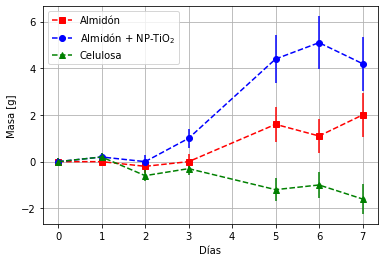

In [12]:
error_resta_1=(error_g(gramos(DV_1))**2 + error_g(gramos(DV_4))**2)**0.5
error_resta_2=(error_g(gramos(DV_2))**2 + error_g(gramos(DV_4))**2)**0.5
error_resta_3=(error_g(gramos(DV_3))**2 + error_g(gramos(DV_4))**2)**0.5

plt.plot(x,(gramos(DV_1)-gramos(DV_4)),'s--',label='Almidón',zorder=3,color='red')
plt.plot(x,(gramos(DV_3)-gramos(DV_4)),'o--',label='Almidón + NP-TiO$_2$',zorder=3,color='blue')
plt.plot(x,(gramos(DV_2)-gramos(DV_4)),'^--',label='Celulosa',zorder=3,color='green')
plt.errorbar(x,(gramos(DV_1)-gramos(DV_4)), yerr=error_resta_1, fmt='.',color='red')
plt.errorbar(x,(gramos(DV_3)-gramos(DV_4)), yerr=error_resta_3, fmt='.',color='blue')
plt.errorbar(x,(gramos(DV_2)-gramos(DV_4)), yerr=error_resta_2, fmt='.',color='green')
plt.legend()
plt.legend()
plt.grid(True)
plt.xlabel('Días')
plt.ylabel('Masa [g]')
plt.savefig('primera_medicion_restado.png')
plt.show()